Extract the dataset from kaggle

In [3]:
import kaggle
! kaggle datasets download -d nikhil7280/weather-type-classification


Dataset URL: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification
License(s): other




  0%|          | 0.00/186k [00:00<?, ?B/s]
100%|██████████| 186k/186k [00:00<00:00, 258kB/s]
100%|██████████| 186k/186k [00:00<00:00, 257kB/s]


In [4]:
import zipfile as zp
ref = zp.ZipFile('weather-type-classification.zip')
ref.extractall()
ref.close()

## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Explore and understand the data

In [49]:
df = pd.read_csv('weather_classification_data.csv')
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


## plot the total number of different classes in the data

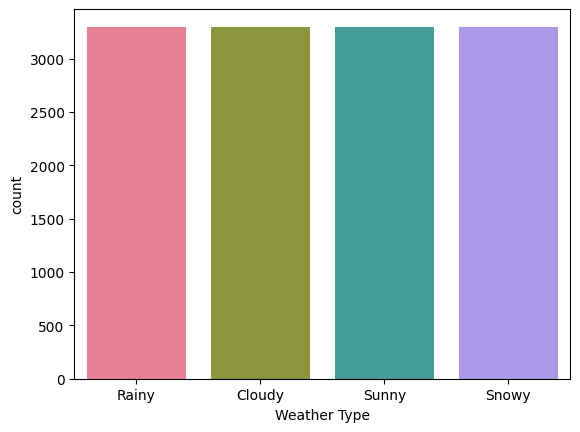

In [55]:
sns.countplot(data=df, x='Weather Type', palette= 'husl')
plt.show()

## Checking for the null values in the data

In [52]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

## Outlier analysis

In [53]:
column = df.columns
column

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [57]:
numeric_cols = [cols for cols in column if df[cols].dtype in ['int64', 'float64']]
cat_cols = [cols for cols in column if df[cols].dtype == 'object']

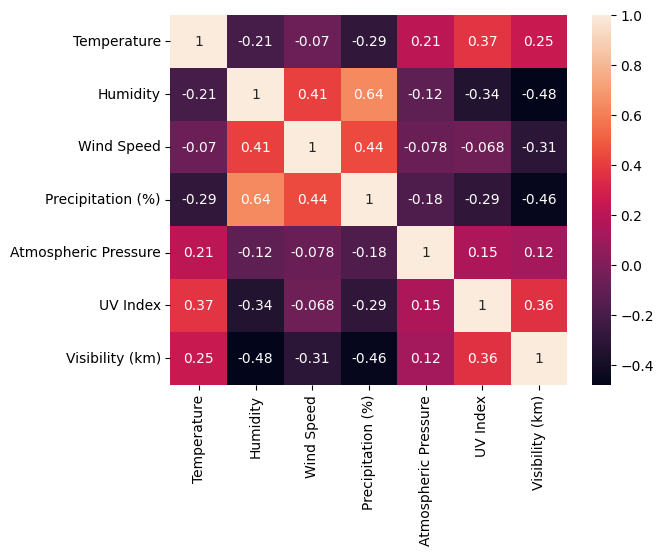

In [58]:
sns.heatmap(data= df[numeric_cols].corr(), annot=True)
plt.show()

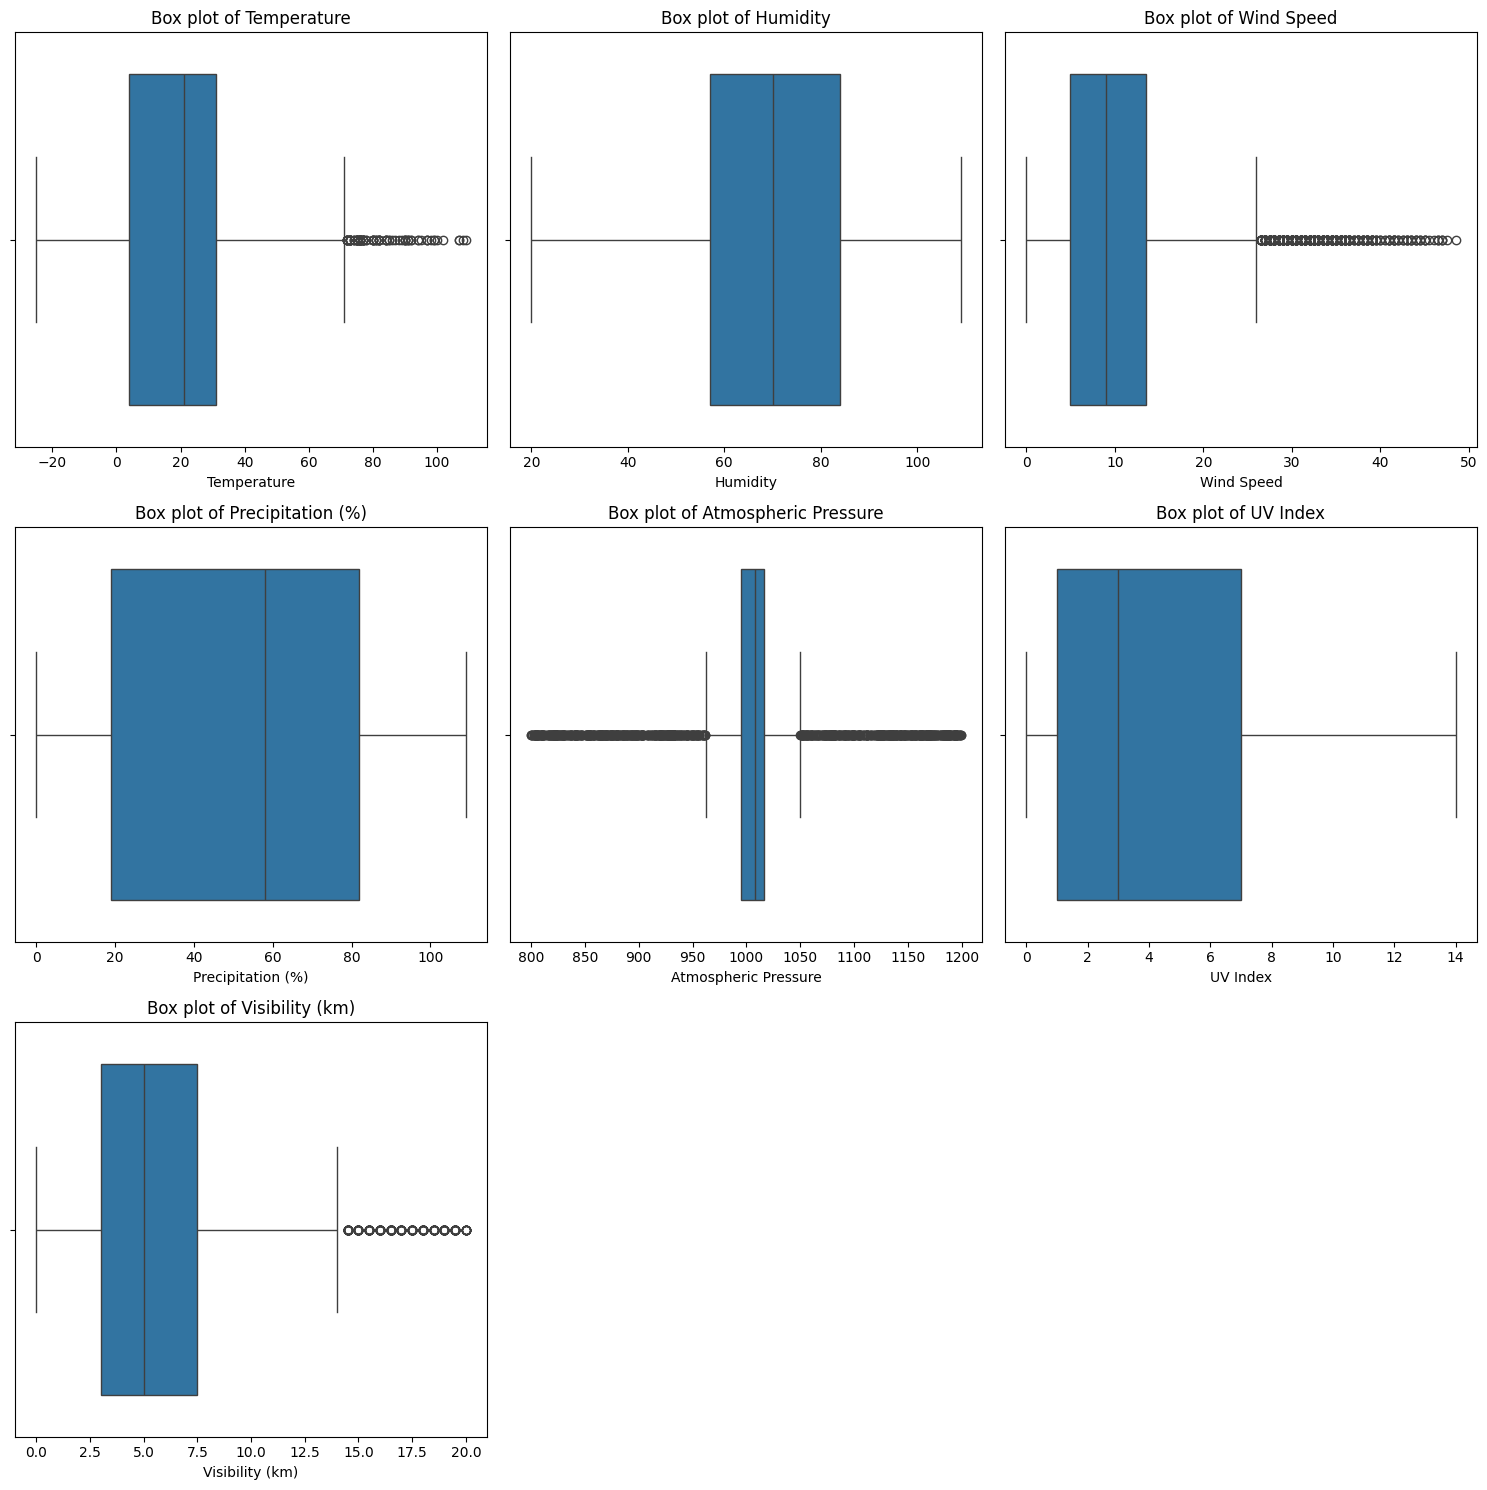

In [9]:
num_plots = len(numeric_cols)

num_cols = 3 
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=col, ax=axes[idx])
    axes[idx].set_title(f'Box plot of {col}')

for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [10]:
df = df[df['Wind Speed']<=25]
df = df[(df['Atmospheric Pressure']>=950) & (df['Atmospheric Pressure']<=1050)]
df = df[df['Humidity']<=90]
df = df[df['Visibility (km)'] <= 12]

In [11]:
df['Weather Type'].unique()

array(['Rainy', 'Sunny', 'Cloudy', 'Snowy'], dtype=object)

## preprocess the data by converting the categorical data into numerical values

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cols in df.columns:
    if df[cols].dtype == 'object':
        df[cols] = le.fit_transform(df[cols])

In [13]:
df['Weather Type'].unique()

array([1, 3, 0, 2])

## Spliting the data

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('Weather Type',  axis=1)
Y = df['Weather Type']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.35, random_state=42)

## Model creation and evoluation

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)


In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       997
           1       0.94      0.95      0.94       736
           2       0.99      0.99      0.99       747
           3       0.98      0.95      0.96       971

    accuracy                           0.96      3451
   macro avg       0.96      0.96      0.96      3451
weighted avg       0.96      0.96      0.96      3451



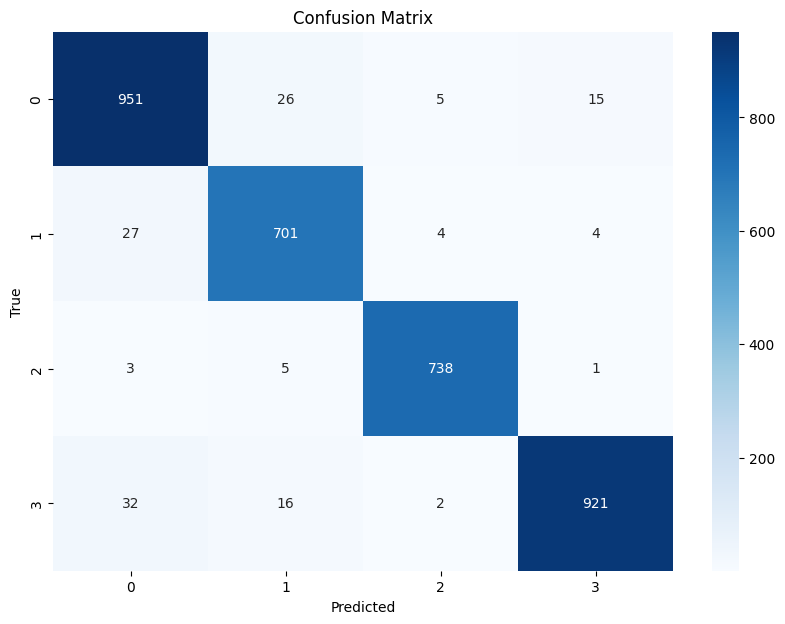

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Plot the important features using random forest classifier

In [59]:
from  sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)


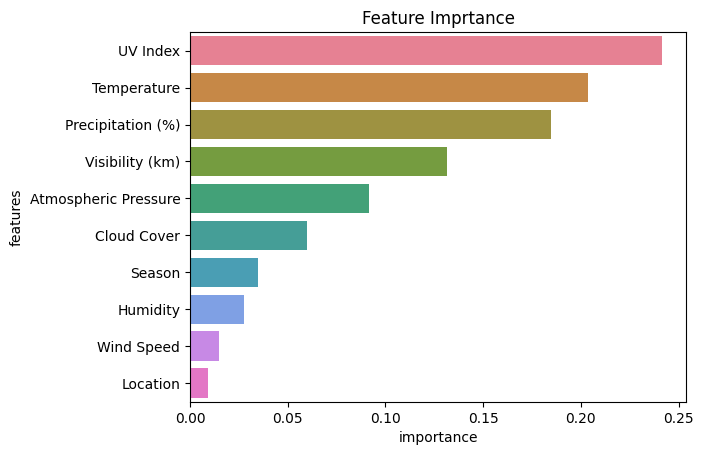

In [60]:
imp_features = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)
sns.barplot( x=imp_features, y=imp_features.index, palette='husl')
plt.title('Feature Imprtance')
plt.xlabel('importance')
plt.ylabel('features')
plt.show()